# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import os
from utils import get_dataset 
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from waymo_open_dataset import dataset_pb2 as open_dataset
#import tensorflow_datasets as tfds
%matplotlib inline

In [2]:
# 데이터 경로 설정 (set the dataset path)
valset = get_dataset("/home/workspace/data/val/*.tfrecord")
testset = get_dataset("/home/workspace/data/test/*.tfrecord")
trainset = get_dataset("/home/workspace/data/train/*.tfrecord")
dataset = get_dataset("/home/workspace/data/train_n_val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 3
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
INFO:tensorflow

In [3]:
dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
# Set the function for display image with bounding box
def display_images(batch, ax, key_counter, color_map):
    """
    This function takes a batch from the dataset and display the image with
    the associated bounding boxes.
    """
    x = key_counter % 2
    y = key_counter % 5
    image = batch['image'].numpy().astype("uint8")

    # Display data as an image, i.e., on a 2D regular raster
    ax[x, y].imshow(image)

    bboxes = batch['groundtruth_boxes'].numpy()
    labels = batch['groundtruth_classes'].numpy()
    for bbox, label in zip(bboxes, labels):
        y1, x1, y2, x2 = bbox
        # convert normalized positions to 640x640
        y1 = y1 * 640
        x1 = x1 * 640
        y2 = y2 * 640
        x2 = x2 * 640
        rec = Rectangle((x1, y1), x2 - x1, y2 - y1,
                        facecolor='none', edgecolor=color_map[label])
        ax[x, y].add_patch(rec)

    ax[x, y].axis('off')

## Display 10 images (for each data set)

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

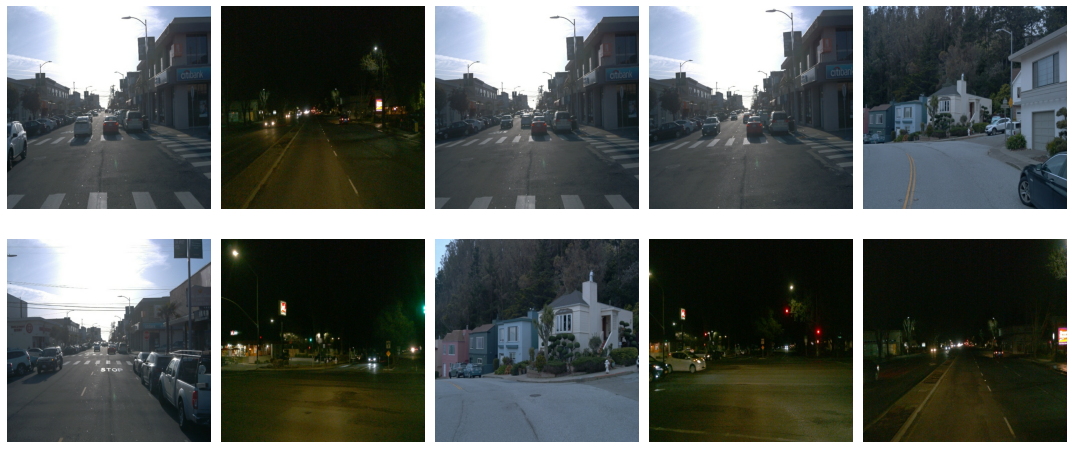

#################################################################################################


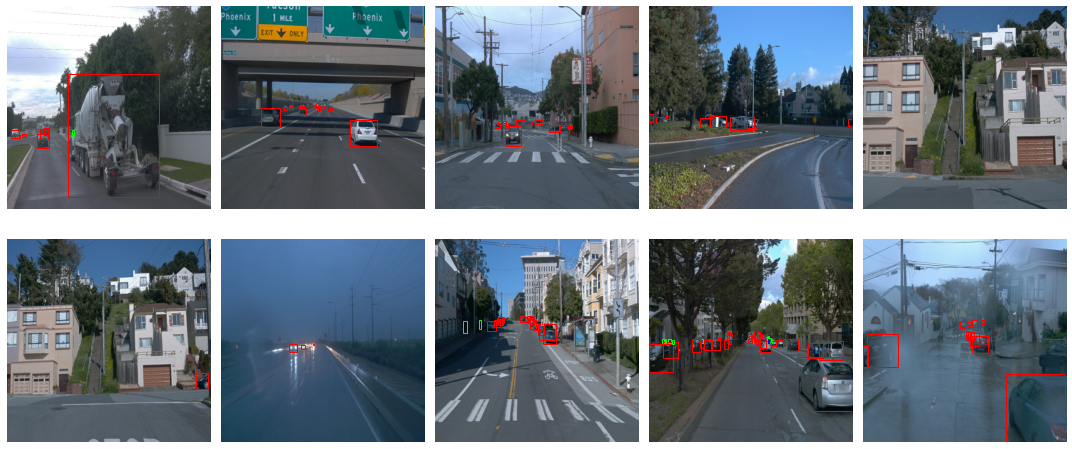

In [5]:
def dataset_choice(dataset):
    # color mapping of classes
    color_map = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    # prepare image plot
    f, ax = plt.subplots(2, 5, figsize=(15, 15))
    key_counter = 0
    # Randomly choose 10 images
    for data in dataset.take(10):
        display_images(data, ax, key_counter, color_map)
        key_counter+=1

    plt.tight_layout(rect=[0, 0, 1, 0.65])
    plt.show()


#dataset_choice(trainset)#display trainset images
#print('##################################################')
#dataset_choice(valset) #display valset images
#print('##################################################')
dataset_choice(testset) #display testset images
print('#################################################################################################')
dataset_choice(dataset) #display dataset images

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [6]:
#dataset path
train_dataset =  len(glob.glob("/home/workspace/data/train/*.tfrecord"))
val_dataset =  len(glob.glob("/home/workspace/data/val/*.tfrecord"))
test_dataset =  len(glob.glob("/home/workspace/data/test/*.tfrecord"))
print(train_dataset,val_dataset,test_dataset)

86 10 3


Text(0.5, 1.0, 'Train, Validation and Test tfrecords distribution ')

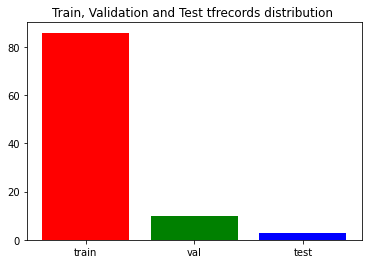

In [7]:
#display the each dataset 
xlabel=["train","val","test"]
plt.bar(xlabel,[train_dataset,val_dataset,test_dataset],color=["red","green","blue"])
plt.title("Train, Validation and Test tfrecords distribution ")

In [8]:
#set the function for display distribution for each data set

def class_count(dataset):
    class_total_count = {"car": 0, "pedestrian": 0, "cyclist": 0}
    class_keys = [k for k, v in class_total_count.items()]
    class_count = [v for k, v in class_total_count.items()]
    for batch in dataset.take(10000):
        classes = batch['groundtruth_classes'].numpy()
        for c in classes:
            if c == 1:
                class_total_count[class_keys[0]] += 1
            elif c == 2:
                class_total_count[class_keys[1]] += 1
            else:
                class_total_count[class_keys[2]] += 1
    print(class_total_count)
    class_name = ["vehicle","pedestrian","cyclist"]
    plt.bar(class_name,class_total_count.values(),color=["red","blue","green"])
    plt.ylabel("Objects counts")
    plt.title("Distribution of 3 class for 10000 images")

{'car': 173434, 'pedestrian': 48819, 'cyclist': 1246}


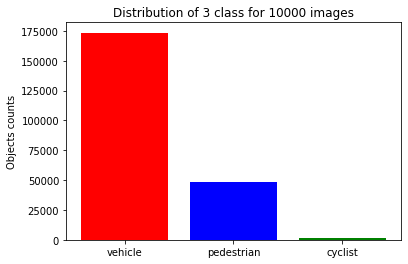

In [9]:
class_count(trainset)

{'car': 149216, 'pedestrian': 14127, 'cyclist': 0}


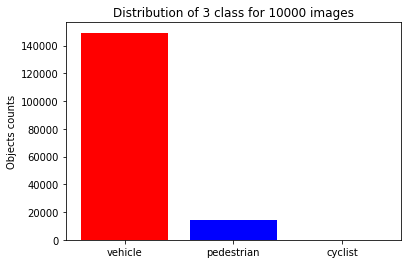

In [10]:
class_count(testset)

In [ ]:
class_count(valset)